In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [ ]:
import string
import nltk
nltk.download('stopwords')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Disaster Tweets/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Disaster Tweets/test.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.shape

(7613, 5)

In [ ]:
# Calculating percentage of missing values
train.isnull().sum()*100 / len(train)

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Text(0.5, 0, 'Target')

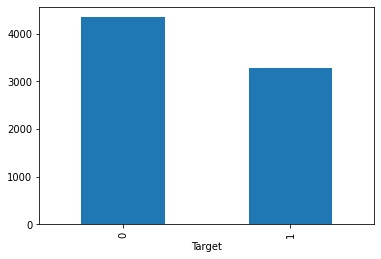

In [ ]:
train['target'].value_counts().plot(kind='bar')
plt.xlabel('Target')

Sample entries of Disaster and Non-Disaster Tweets

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Disaster Tweets
train.text[train['target'] == 1].head(5)


0                                                                    Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1                                                                                                   Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3                                                                        13,000 people receive #wildfires evacuation orders in California 
4                                                 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
Name: text, dtype: object

In [ ]:
# Random Tweets
train.text[train['target'] == 0].head(5)

15                  What's up man?
16                   I love fruits
17                Summer is lovely
18               My car is so fast
19    What a goooooooaaaaaal!!!!!!
Name: text, dtype: object

In [ ]:
train['location'].value_counts().sort_values(ascending=False)[:20]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
San Francisco       14
Name: location, dtype: int64

In [ ]:
# replacing some names from locations to be all countries
replace_names= {
    "USA":"United States",
    "New York":"United States",
    "Los Angeles": "United States",
    "Los Angeles, CA":"United States",
    "Washington, DC": "United States",
    "San Francisco": "United States",
    "San Francisco, CA": "United States",
    "Chicago, IL": "United States",
    "Chicago": "United States",
    "New York, NY": "United States",
    "New York City" : "United States",
    "NYC": "United States",
    "Florida": "United States",
    "London": "UK",
    "United Kingdom": "UK",
    "Mumbai": "India",
    "California": "United States",
    "California, USA": "United States",
    "Toronto": "Canada",
    "Washington, D.C.": "United States",
    "Sacramento, CA" : "United States",
    "Everywhere": "Worldwide",
    "Seattle": "United States",
    "ss": "Worldwide"
}

train["location_mod"] = train["location"].replace(replace_names)
# Note: Counts may not be accurate because not all area's have been replaced!
train["location_mod"].value_counts().sort_values(ascending=False)[:20]

United States       456
UK                   86
India                46
Worldwide            44
Canada               41
Nigeria              28
Kenya                20
Australia            18
Indonesia            13
Ireland              12
Earth                11
Texas                10
London, UK           10
London, England      10
Atlanta, GA          10
Dallas, TX            9
Denver, Colorado      9
San Diego, CA         9
US                    9
Manchester            9
Name: location_mod, dtype: int64

In [ ]:
# Keyword!
train.groupby('keyword').size()

keyword
ablaze                 36
accident               35
aftershock             34
airplane%20accident    35
ambulance              38
                       ..
wounded                37
wounds                 33
wreck                  37
wreckage               39
wrecked                39
Length: 221, dtype: int64

Text(0.5, 0, 'Keyword')

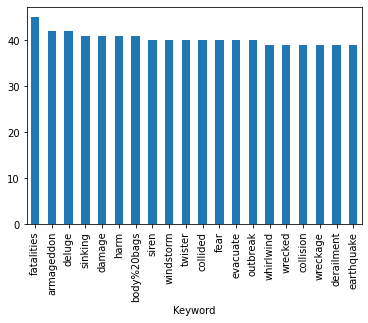

In [ ]:
#Top 20 keywords
train['keyword'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')
plt.xlabel('Keyword')

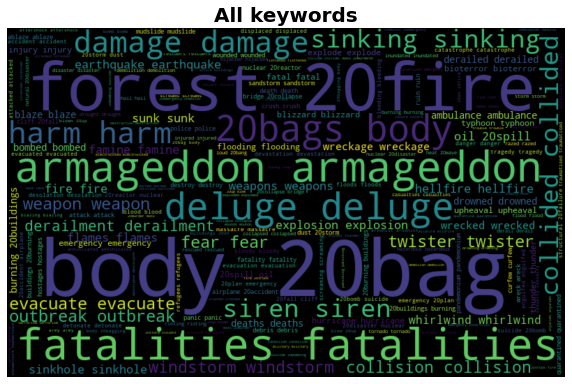

In [ ]:
from wordcloud import WordCloud
# getting all the keywords from keyword column
all_keywords = " ".join([keyword for keyword in train["keyword"].dropna()])

# visualizing keywords
word_cloud= WordCloud(width=800,
                      height=500,
                      max_font_size=112,
                      random_state=24).generate(all_keywords)

# plotting
plt.figure(figsize=(10, 8))
plt.title("All keywords", size=20, weight="bold")
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

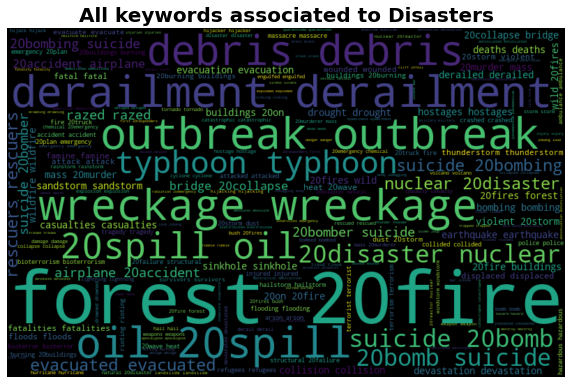

In [ ]:
# all keywords from tweets associated to a disaster
all_disaster_keywords = " ".join([keyword for keyword in train[train["target"]==1]["keyword"].dropna()])

# visualizing keywords
word_cloud= WordCloud(width=800,
                      height=500,
                      max_font_size=112,
                      random_state=24).generate(all_disaster_keywords)

# plotting
plt.figure(figsize=(10, 8))
plt.title("All keywords associated to Disasters", size=20, weight="bold")
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are duplicate entries based on the four fields 'keyword', 'location', 'text', 'target'; Hence we drop 52 entries


In [ ]:
duplicateRowsDF = train[train.duplicated(['keyword', 'location', 'text', 'target'])]
#duplicateRowsDF = train[train.duplicated(['text', 'target'])]

In [ ]:
duplicateRowsDF.sort_values('text')

,id,keyword,location,text,target
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6378,9114,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6377,9113,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
2828,4064,displaced,NaN,#KCA #VoteJKT48ID 12News: UPDATE: A family of 3 has been displaced after fired damaged housed near 90th and Osborn. Fire extinguished no iÛ_,1
2841,4086,displaced,Pedophile hunting ground,#Myanmar Displaced #Rohingya at #Sittwe point of no return http://t.co/cgf61fPmR0 #Prison like conditions #genocide IHHen MSF Refugees,1
6449,9225,suicide%20bombing,NaN,'Suicide bombing at [location named]...' #premonitions http://t.co/iIkSsJGBDn,1
2833,4077,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4,1
2831,4072,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4,1


In [ ]:
len(train)

7613

In [ ]:
train_df = train.drop_duplicates(subset=['keyword', 'location', 'text', 'target'])

In [ ]:
len(train_df)

7561

In [ ]:
# add all the tweets with duplicates
train_duplicates = train_df[train_df["text"].duplicated()].groupby(["text"])[["target"]].agg(list)

diff_label_idx = []
for idx, val in enumerate(train_duplicates["target"]):
    for ele in val:
        if ele != val[0]:
            diff_label_idx.append(idx)

print(f"Number of Duplicated Tweets with different target labels in train: {len(diff_label_idx)}")

Number of Duplicated Tweets with different target labels in train: 4


In [ ]:
train_duplicates

,target
text,
#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,"[0, 1]"
#Newswatch: 2 vehicles collided at Lock and Lansdowne Sts in #Ptbo. Emerg crews on their way,[1]
#SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.,[1]
#TweetLikeItsSeptember11th2001 Those two buildings are on fire,[1]
#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,"[1, 0]"
#stormchase Violent Record Breaking EF-5 El Reno Oklahoma Tornado Nearly Runs Over ... - http://t.co/3SICroAaNz http://t.co/I27Oa0HISp,[1]
(#LosDelSonido) Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Ma... (#IvanBerroa),[1]
.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4,[0]
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,"[1, 1, 1, 1]"


In [ ]:
train_duplicates.iloc[diff_label_idx]

,target
text,
#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,"[0, 1]"
#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,"[1, 0]"
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',"[0, 1]"
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,"[0, 1]"


## Data Pre-processing


Combine train and test data to do pre-processing

In [ ]:
# Concating train and test
full_df = pd.concat(objs=[train, test], axis=0)
full_df.head() # train data would be above the test data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0


In [ ]:
def target_relabel(df:pd.DataFrame) -> pd.DataFrame:
    """
    Relabel duplicate tweets that are mislabelled in the training dataset
    :param df: A pandas dataframe with a "target" column
    :return: df
    """
    # manually relabel all mislabelled targets
    df.loc[df["text"]==
           "#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect",
           "target"]= 0
    df.loc[df["text"]==
          "#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption",
          "target"] = 0
    df.loc[df["text"]==
          ".POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4",
          "target"] = 0
    df.loc[df["text"]==
          "CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring",
          "target"] = 1
    df.loc[df["text"]==
          "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam",
          "target"] = 0
    df.loc[df["text"]==
          "Hellfire is surrounded by desires so be careful and don‰Ûªt let your desires control you! #Afterlife",
          "target"] = 0
    df.loc[df["text"]==
          "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
          "target"] = 0
    df.loc[df["text"]=="To fight bioterrorism sir.", "target"] = 0
    df.loc[df["text"]==
          "that horrible sinking feeling when you‰Ûªve been at home on your phone for a while and you realise its been on 3G this whole time",
          "target"] = 0
    return df

In [ ]:
train_df = train

In [ ]:
len(train_df)

7613

In [ ]:
train_df = target_relabel(train_df)

In [ ]:
len(train_df)

7613

In [ ]:
train_df = train_df.drop_duplicates(subset=['keyword', 'location', 'text', 'target'])

In [ ]:
len(train_df)

7557

In [ ]:
# function to clean tweets
def clean_tweet(tweet:str) -> str:
    """
    Convert all text to lowercase, remove stock market tickers, RT symbol, hyperlinks and the hastag symbol
    :param tweet: tweet by a unique user
    :return: cleaned string without hashtags, emojis, and punctuation
    """
    # make text lower case
    tweet = tweet.lower()
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', str(tweet))
    #Remove urls
    tweet = re.sub(r'https?://\S+|www\.\S+', '', str(tweet))
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', str(tweet))
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', str(tweet))
    # remove hashtags
    tweet = re.sub(r'#', '', str(tweet))
    # remove punctuation
    punct = set(string.punctuation)
    tweet = "".join(ch for ch in tweet if ch not in punct)
    #remove html tags
    tweet = re.sub(r'<.*?>', '', str(tweet))
    #remove emoticons tags
    tweet = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE).sub(r'',str(tweet))
    # remove stopwords
    stop_words = set(stopwords.words("english"))
    tweet = " ".join(word for word in tweet.split() if word not in stop_words)

    return tweet


In [ ]:
train_df["text_clean"] = train_df["text"].apply(clean_tweet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_df

,id,keyword,location,text,target,location_mod,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,NaN,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,NaN,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,NaN,residents asked shelter place notified officers evacuation shelter place orders expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,NaN,13000 people receive wildfires evacuation orders california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,NaN,got sent photo ruby alaska smoke wildfires pours school
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,NaN,two giant cranes holding bridge collapse nearby homes
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,NaN,ariaahrary thetawniest control wild fires california even northern part state troubling
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,NaN,m194 0104 utc5km volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,NaN,police investigating ebike collided car little portugal ebike rider suffered serious nonlife threatening injuries


In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 5.4 MB/s 


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spelling(text):
    corrected_text=[]
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [ ]:
test["text_clean"] = test["text"].apply(clean_tweet)

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [ ]:
# target variable
y = train_df["target"].values

# initializing Kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# count vectorizer transformation
count_vect = CountVectorizer()
count_vect.fit(train_df["text_clean"].values.tolist() + test["text_clean"].values.tolist())
train_count_vect = count_vect.transform(train_df["text_clean"])

# tfidf vectorizer transformation
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(train_df["text_clean"].values.tolist() + test["text_clean"].values.tolist())
train_tfidf_vect = tfidf_vect.transform(train_df["text_clean"])

Classification



In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [ ]:
# models
models= {
    "svm": SVC(),
    "logistic_regression": LogisticRegression(),
    "naive_bayes": MultinomialNB(),
    "SGD": SGDClassifier(),
    "random_forest": RandomForestClassifier()
}

# current vectors
vectors = {
    "count_vect": train_count_vect,
    "tfidf_vect": train_tfidf_vect
}

In [ ]:
def stratified_kfold(clf:str, vect_type:str, y, kfold):
    """
    Perform Kfold Cross-Validation
    :param model: the model used to make predictions
    :param X: the train features being used
    :param y: the target feature,
    :param kfold: the cross validation strategy
    :return: dictionary with model name key and results as the values
    """
    results = {}
    # store the name of the model in dictionary
    results["model_name"] = clf + "_" + vect_type

    # call the model and training data
    model = models[clf]
    X = vectors[vect_type]

    # perfrom kfold cv
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        # train on seen data, predict on unseen
        model.fit(X_train, y_train)
        y_preds = model.predict(X_valid)

        results["fold_{}".format(fold+1)] = f1_score(y_valid, y_preds)
    return results

In [ ]:
# store all models
all_models = []

for clf in models:
    for vect in vectors:
        all_models.append(stratified_kfold(clf, vect, y, skf))
        print(f"Current Model: {clf}_{vect}...\n")

Current Model: svm_count_vect...

Current Model: svm_tfidf_vect...

Current Model: logistic_regression_count_vect...

Current Model: logistic_regression_tfidf_vect...

Current Model: naive_bayes_count_vect...

Current Model: naive_bayes_tfidf_vect...

Current Model: SGD_count_vect...

Current Model: SGD_tfidf_vect...

Current Model: random_forest_count_vect...

Current Model: random_forest_tfidf_vect...



In [ ]:
# convert to df
models_df = pd.DataFrame(all_models)
models_df

,model_name,fold_1,fold_2,fold_3,fold_4,fold_5
0,svm_count_vect,0.729370,0.718835,0.732394,0.731409,0.743111
1,svm_tfidf_vect,0.714545,0.691358,0.721763,0.719711,0.717190
2,logistic_regression_count_vect,0.735000,0.725406,0.741800,0.745033,0.760099
3,logistic_regression_tfidf_vect,0.728559,0.696942,0.730388,0.722124,0.738626
4,naive_bayes_count_vect,0.746365,0.735632,0.764466,0.735247,0.764940
5,naive_bayes_tfidf_vect,0.736658,0.722073,0.732865,0.730435,0.750656
6,SGD_count_vect,0.732642,0.709409,0.716150,0.730616,0.752220
7,SGD_tfidf_vect,0.730449,0.717557,0.739680,0.742285,0.754967
8,random_forest_count_vect,0.734155,0.709677,0.725541,0.728196,0.728534
9,random_forest_tfidf_vect,0.716549,0.693915,0.706512,0.714777,0.714545
